In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings("ignore")

#Load Dataset

In [ ]:
df=pd.read_excel("/content/Bookings.xlsx")
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [ ]:
#check the shape of dataset
df.shape

(103024, 20)

In [ ]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [ ]:
#check the duplicated row
df.duplicated().sum()

0

In [ ]:
#duplicated columns
df.T.duplicated().sum()

0

In [ ]:
#check the null values
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057


In [ ]:
#drop the column that nessary columns Incomplete_Rides_Reason
df.drop(["Incomplete_Rides_Reason","Canceled_Rides_by_Customer","Canceled_Rides_by_Driver"],axis=1,inplace=True)


In [ ]:
#make date column to dsate column
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
#drop the time column
df.drop(["Time"],axis=1,inplace=True)

In [ ]:
#check the null values
df.isnull().sum()

,0
Date,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057
Incomplete_Rides,39057


In [ ]:
#drop the vichile image column
df.drop(["Vehicle Images"],axis=1,inplace=True)

In [ ]:
df['Booking_Status'].unique()

array(['Canceled by Driver', 'Success', 'Canceled by Customer',
       'Driver Not Found'], dtype=object)

#Fill  the null values

In [ ]:
# Function to fill missing values based on ride status
def fill_values(row):
    # If the booking was canceled, reset key fields to default values
    if 'Canceled' in row['Booking_Status']:
        row['V_TAT'] = 0.0  # Vehicle Turnaround Time
        row['C_TAT'] = 0.0  # Customer Turnaround Time
        row['Incomplete_Rides'] = 'Yes'  # Mark ride as incomplete
        row['Booking_Value'] = 0  # No value for canceled rides
        row['Payment_Method'] = 'Not Applicable'  # Payment irrelevant
        row['Ride_Distance'] = 0  # No distance traveled
        row['Driver_Ratings'] = 0  # No ratings recorded
        row['Customer_Rating'] = 0  # No customer rating
    else:
        # If incomplete rides are not specified, assume 'No'
        row['Incomplete_Rides'] = row['Incomplete_Rides'] if pd.notna(row['Incomplete_Rides']) else 'No'
    return row

# Apply the cleaning function to the DataFrame
df= df.apply(fill_values, axis=1)

In [ ]:
# Fill missing numeric fields with 0
numeric_cols = ['V_TAT', 'C_TAT', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill missing Payment_Method with 'Not Applicable'
df['Payment_Method'] = df['Payment_Method'].fillna('Not Applicable')

In [ ]:
df.head()

,Date,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Incomplete_Rides,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,0.0,0.0,Yes,0,Not Applicable,0,0.0,0.0
1,2024-07-25 22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,No,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,No,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,0.0,0.0,Yes,0,Not Applicable,0,0.0,0.0
4,2024-07-02 09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,No,822,Credit Card,45,4.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              103024 non-null  datetime64[ns]
 1   Booking_ID        103024 non-null  object        
 2   Booking_Status    103024 non-null  object        
 3   Customer_ID       103024 non-null  object        
 4   Vehicle_Type      103024 non-null  object        
 5   Pickup_Location   103024 non-null  object        
 6   Drop_Location     103024 non-null  object        
 7   V_TAT             103024 non-null  float64       
 8   C_TAT             103024 non-null  float64       
 9   Incomplete_Rides  103024 non-null  object        
 10  Booking_Value     103024 non-null  int64         
 11  Payment_Method    103024 non-null  object        
 12  Ride_Distance     103024 non-null  int64         
 13  Driver_Ratings    103024 non-null  float64       
 14  Cust

In [ ]:
df['Booking_Status'].value_counts()

,count
Booking_Status,
Success,63967
Canceled by Driver,18434
Canceled by Customer,10499
Driver Not Found,10124


#save the Csv file

In [ ]:
#save the csv file
df.to_csv("Cleaned_Bookings.csv",index=False)

In [ ]:
#check the hape ofdata
df.shape

(103024, 15)

In [ ]:
#copy the dataframe
df2=df.copy()

In [ ]:
#check the null values
df.isnull().sum()

,0
Date,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0
Incomplete_Rides,0


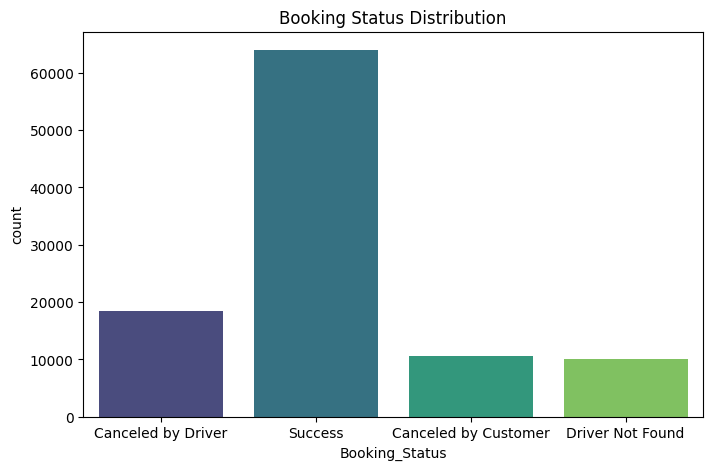

In [ ]:
#Booking status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Booking_Status', palette='viridis')
plt.title('Booking Status Distribution')
plt.show()

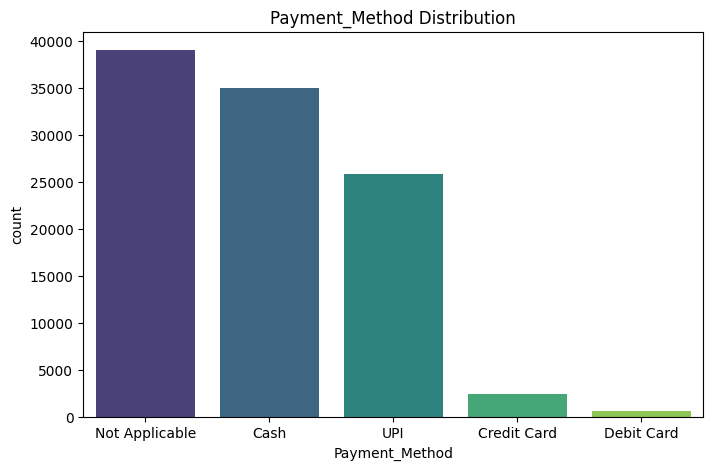

In [ ]:
#Payment_Method distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Payment_Method', palette='viridis')
plt.title('Payment_Method Distribution')
plt.show()

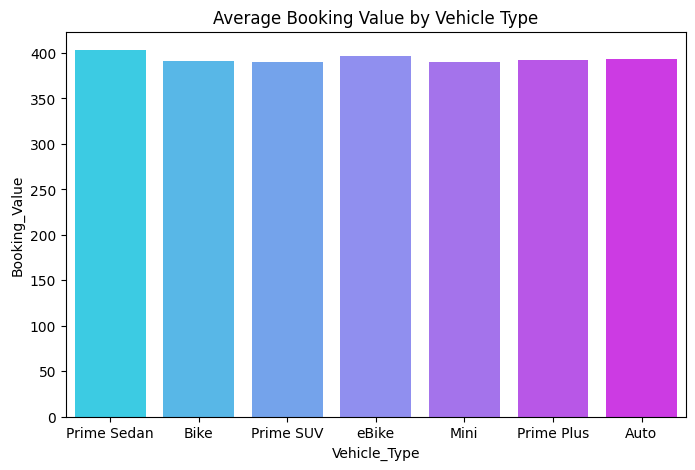

In [ ]:
# Average booking value by vehicle type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Vehicle_Type', y='Booking_Value', ci=None, palette='cool')
plt.title('Average Booking Value by Vehicle Type')
plt.show()

In [ ]:
#columns
df.columns

Index(['Date', 'Booking_ID', 'Booking_Status', 'Customer_ID', 'Vehicle_Type',
       'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Incomplete_Rides', 'Booking_Value', 'Payment_Method', 'Ride_Distance',
       'Driver_Ratings', 'Customer_Rating'],
      dtype='object')

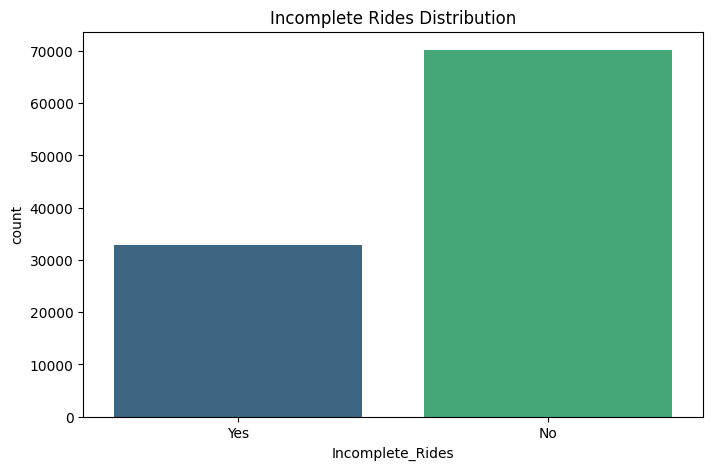

In [ ]:
#incomplete rides column bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Incomplete_Rides', palette='viridis')
plt.title('Incomplete Rides Distribution')
plt.show()

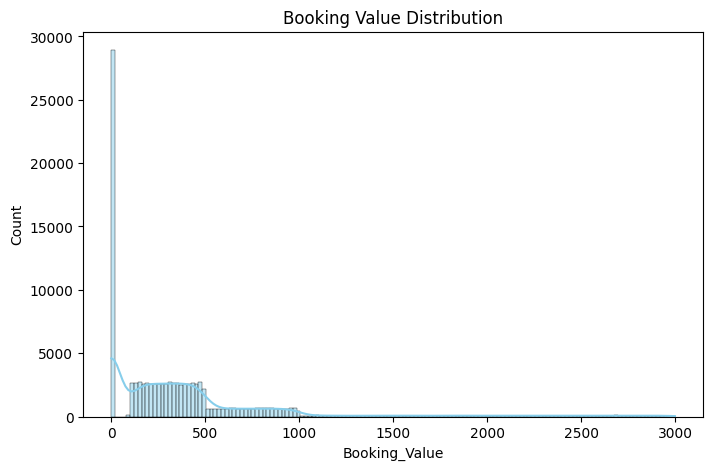

In [ ]:
# Booking Value Histogram with Line Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['Booking_Value'], kde=True, color='skyblue')
plt.title('Booking Value Distribution')
plt.show()

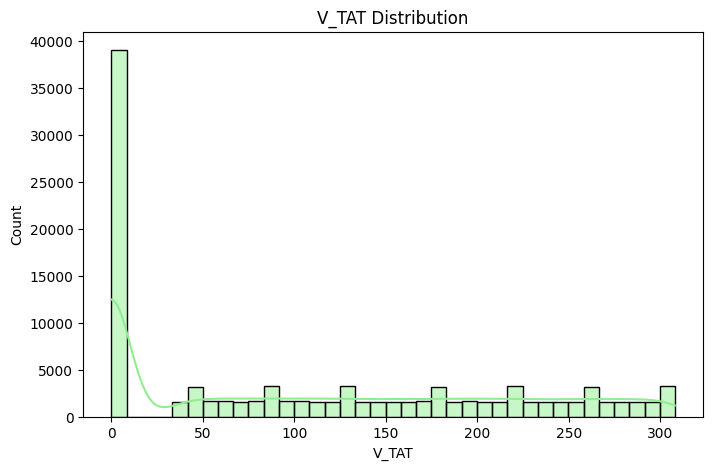

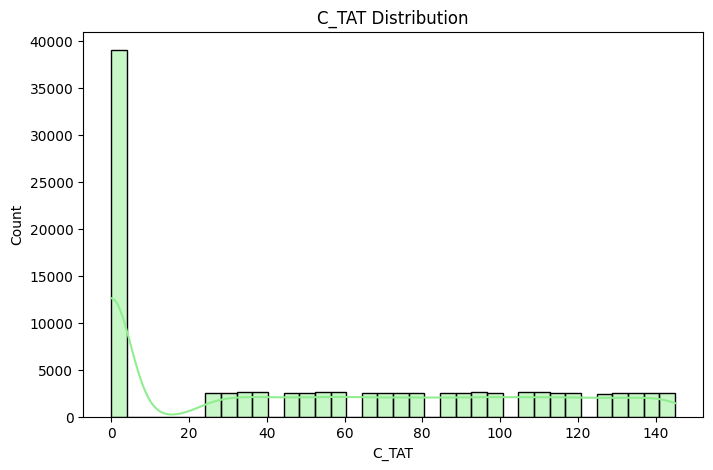

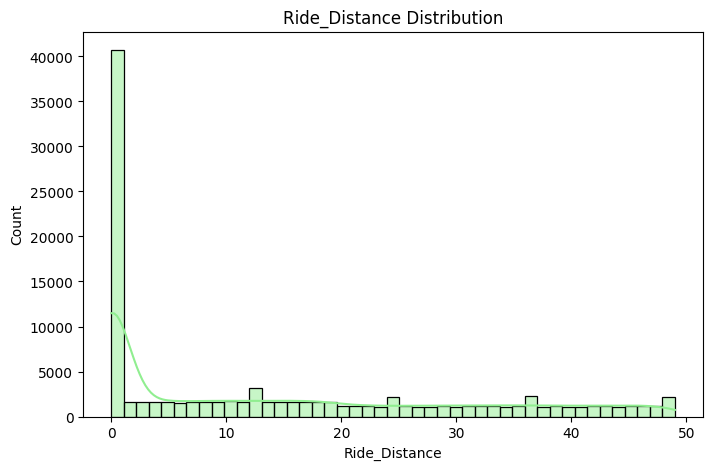

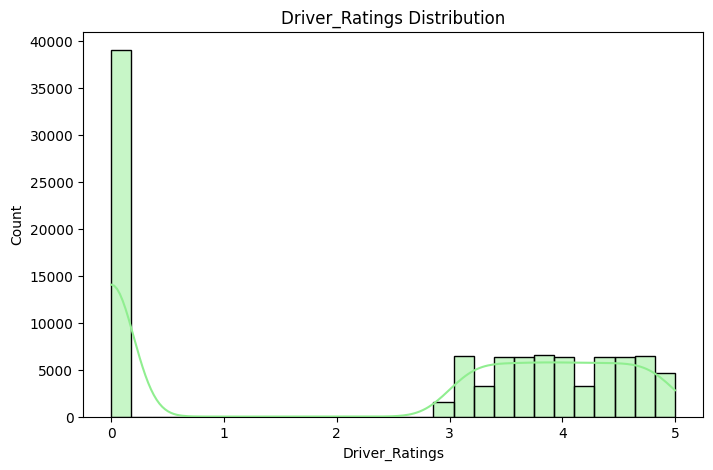

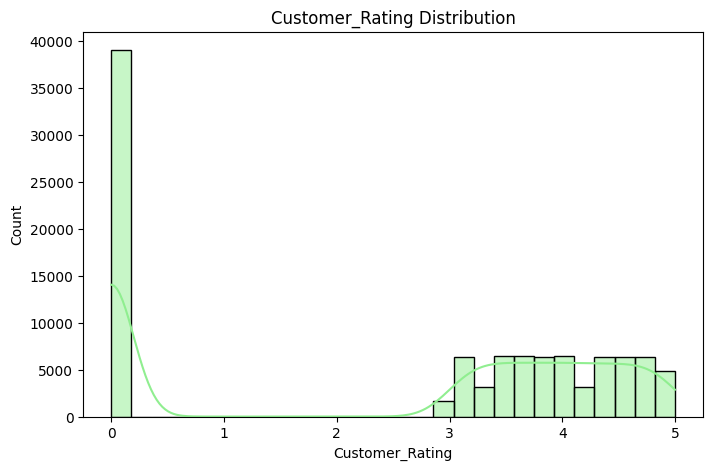

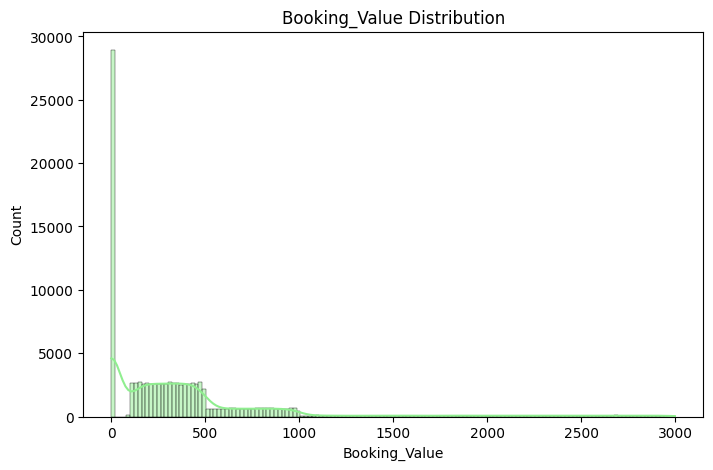

In [ ]:
# Analyze all value columns
value_columns = ['V_TAT', 'C_TAT', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Booking_Value']
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='lightgreen')
    plt.title(f'{col} Distribution')
    plt.show()